In [2]:
import sys
sys.path.append("../../")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
#from classy import Class

In [5]:
from axion_kSZ_source.axion_camb_wrappers.run_axion_camb import AxionCAMBWrapper
from axion_kSZ_source.theory.cosmology import Cosmology,CosmologyCustomH
from axion_kSZ_source.theory.sigma_interpolation import SigmaInterpolator
from axion_kSZ_source.theory.sigma_interpolation_FFTLog import SigmaInterpolatorFFTLog
from axion_kSZ_source.auxiliary.integration_helper import IntegrationHelper
from axion_kSZ_source.auxiliary.window_functions import WindowFunctions
from axion_kSZ_source.theory.eli_mass_functions import EliMassFunction
from axion_kSZ_source.theory.eli_mass_functions import BubbleMassFunction
from axion_kSZ_source.theory.halo_bias_new import HaloBias
from axion_kSZ_source.theory.correlation_functions import CorrelationFunctions
from axion_kSZ_source.theory.correlation_functions_FFTLog import CorrelationFunctions as CorrelationFunctionsFFTLog

In [6]:
#cosmo = CosmologyCustomH.generate(h=0.50)
cosmoDefault = Cosmology.generate(m_axion=1.e-26, axion_frac=0.005,h=0.72,read_H_from_file=True)
# cosmoDefault2 = Cosmology.generate(m_axion=1.e-26,axion_frac=0.5,h=0.72,read_H_from_file=True)

In [137]:
cosmoAxion = Cosmology.generate(m_axion=1.e-26,axion_frac=0.05,h=0.72,read_H_from_file=True)

In [138]:
outpath = "./sigma_tests/"
fileroot ="test_axion"
log_path = outpath+"sigma_test_axion_log.log"

cambAxion = AxionCAMBWrapper(outpath, fileroot, log_path)
cambAxion(cosmoAxion)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


True

In [7]:
outpath = "./sigma_tests/"
fileroot ="test"
log_path = outpath+"sigma_test_log.log"

camb = AxionCAMBWrapper(outpath, fileroot, log_path)
fileroot ="test2"
log_path = outpath+"sigma_test2_log.log"
# camb2 = AxionCAMBWrapper(outpath, fileroot, log_path)

camb(cosmoDefault)
# camb2(cosmoDefault2)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


True

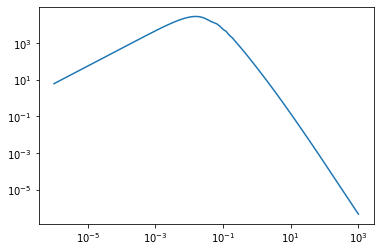

In [12]:
lin_power = camb.get_linear_power(extrap_kmax=1e3, extrap_kmin=1e-6)
# lin2_power = camb2.get_linear_power(extrap_kmax=1e3, extrap_kmin=1e-6)
# lin_power_axion = cambAxion.get_linear_power(extrap_kmax=1e3, extrap_kmin=1e-6)

# k_vals = np.logspace(-6, 3, 100)
# plt.loglog(k_vals, lin_power(k_vals))
# plt.loglog(k_vals, lin2_power(k_vals))
# plt.loglog(k_vals, lin_power_axion(k_vals),label='new')
# plt.legend()

In [13]:
growth = camb.get_growth()
# growth2 = camb2.get_growth()
# growth_axion = cambAxion.get_growth()
# z_vals=np.linspace(0, 6.5, 8)
# plt.plot(z_vals, growth(1e0, z_vals))
# plt.plot(z_vals, growth2(1.e0, z_vals))
# plt.plot(z_vals, growth_axion(1e0, z_vals),label='new')
# plt.legend()

In [14]:
cosmoDefault.set_H_interpolation(camb.get_hubble())

In [142]:
cosmoDefault2.set_H_interpolation(camb2.get_hubble())

In [144]:
cosmoAxion.set_H_interpolation(cambAxion.get_hubble())

In [15]:
intHelper = IntegrationHelper(2048)

In [16]:
window="sharp_k"

In [171]:
sigmaInt = SigmaInterpolator(cosmoDefault, lin_power, growth, 1e6, 1e16, z_vals, intHelper, Nr=1024, window_function=window)
sigmaInt.compute(1e-4, 1e3)

In [170]:
sigmaInt2 = SigmaInterpolator(cosmoDefault2, lin2_power, growth2, 1e6, 1e16, z_vals, intHelper, Nr=1024, window_function=window)
sigmaInt2.compute(1e-4, 1e3)

In [169]:
sigmaInt_axion = SigmaInterpolator(cosmoAxion, lin_power_axion, growth_axion, 1e6, 1e16, z_vals, intHelper, Nr=1024, window_function=window)
sigmaInt_axion.compute(1e-4, 1e3)

In [18]:
z_vals = np.linspace(0,6.5,8)
sigmaIntFFTLog = SigmaInterpolatorFFTLog(cosmoDefault, lin_power, growth, z_vals, 1e-4, 1e3, Nr=1024, window_function=window)
sigmaIntFFTLog.compute()

# sigmaIntFFTLog2 = SigmaInterpolatorFFTLog(cosmoDefault2, lin2_power, growth2, z_vals, 1e-4, 1e3, Nr=1024, window_function=window)
# sigmaIntFFTLog2.compute()




/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


In [149]:
sigmaIntFFTLog_axion = SigmaInterpolatorFFTLog(cosmoAxion, lin_power_axion, growth_axion, z_vals, 1e-4, 1e3, Nr=1024, window_function=window)
sigmaIntFFTLog_axion.compute()

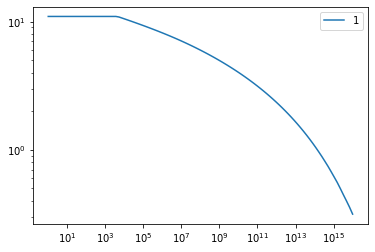

In [20]:
m_vals = np.logspace(0, 16, 100)
plt.loglog(m_vals, sigmaIntFFTLog(m_vals, 0.0),label='1')
# plt.loglog(m_vals, sigmaIntFFTLog2(m_vals, 0.0),label='2')
# plt.loglog(m_vals, sigmaIntFFTLog_axion(m_vals,0.0),label='new')
#plt.loglog(m_vals, -sigmaIntFFTLog.dlogSigma_dlogm(m_vals, 0.0))
plt.legend()

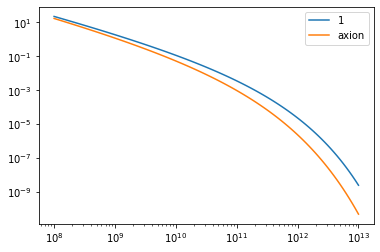

In [203]:
m_vals = np.logspace(8, 13, 100)
plt.loglog(m_vals, bubbly_FFT_default(m_vals, 6),label='1')
# plt.loglog(m_vals, bubbly_FFT_default2(m_vals, 6),label='2')
plt.loglog(m_vals, bubbly_FFT_axion(m_vals,6),label='axion')
plt.legend()

[1.00000000e+04 1.32194115e+04 1.74752840e+04 2.31012970e+04
 3.05385551e+04 4.03701726e+04 5.33669923e+04 7.05480231e+04
 9.32603347e+04 1.23284674e+05 1.62975083e+05 2.15443469e+05
 2.84803587e+05 3.76493581e+05 4.97702356e+05 6.57933225e+05
 8.69749003e+05 1.14975700e+06 1.51991108e+06 2.00923300e+06
 2.65608778e+06 3.51119173e+06 4.64158883e+06 6.13590727e+06
 8.11130831e+06 1.07226722e+07 1.41747416e+07 1.87381742e+07
 2.47707636e+07 3.27454916e+07 4.32876128e+07 5.72236766e+07
 7.56463328e+07 1.00000000e+08 1.32194115e+08 1.74752840e+08
 2.31012970e+08 3.05385551e+08 4.03701726e+08 5.33669923e+08
 7.05480231e+08 9.32603347e+08 1.23284674e+09 1.62975083e+09
 2.15443469e+09 2.84803587e+09 3.76493581e+09 4.97702356e+09
 6.57933225e+09 8.69749003e+09 1.14975700e+10 1.51991108e+10
 2.00923300e+10 2.65608778e+10 3.51119173e+10 4.64158883e+10
 6.13590727e+10 8.11130831e+10 1.07226722e+11 1.41747416e+11
 1.87381742e+11 2.47707636e+11 3.27454916e+11 4.32876128e+11
 5.72236766e+11 7.564633

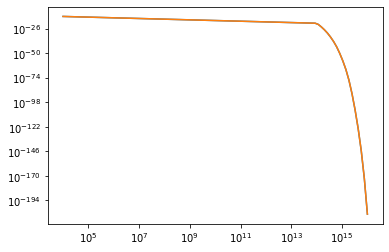

In [39]:
bubbly = BubbleMassFunction(cosmoDefault,sigmaInt)

m_vals = np.logspace(4,16,100)
z = 20

print(bubbly(m_vals,z))

plt.loglog(m_vals,bubbly(m_vals,z))

plt.loglog(m_vals,eli_mass_function(m_vals,z))

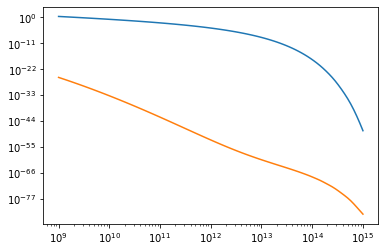

In [176]:
eli_mass_function = EliMassFunction(cosmoDefault, sigmaIntFFTLog)
eli_mass_function_axion = EliMassFunction(cosmoDefault2, sigmaIntFFTLog2)
m_vals = np.logspace(9,15,100)
z = 6
plt.loglog(m_vals,eli_mass_function(m_vals,z),label='1')
plt.loglog(m_vals,eli_mass_function_axion(m_vals,z),label='2')

In [24]:
# Replace PressSchechter w/ copy off PressSchecter & make that work, then replace with bubble mass function

eli_mass_function = EliMassFunction(cosmoDefault, sigmaInt)
hbGW = HaloBias(cosmoDefault, sigmaIntFFTLog, eli_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="gaussian")
hbGW.compute_approximation()


eli_mass_function2 = EliMassFunction(cosmoDefault2, sigmaIntFFTLog2)
hbGW2 = HaloBias(cosmoDefault2, sigmaIntFFTLog2, eli_mass_function2, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="gaussian")
hbGW2.compute_approximation()
# hbTH = HaloBias(cosmoDefault, sigmaIntFFTLog, ps_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="top_hat")
# hbTH.compute_approximation()
# hbSK = HaloBias(cosmoDefault, sigmaIntFFTLog, ps_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="sharp_k")
# hbSK.compute_approximation()

In [25]:
# Bubble time

bubble_mass_function = BubbleMassFunction(cosmoDefault, sigmaInt)
# hbGW = HaloBias(cosmoDefault, sigmaIntFFTLog, bubble_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="gaussian")
# hbGW.compute_approximation()



# bubble_mass_function2 = BubbleMassFunction(cosmoDefault2, sigmaIntFFTLog2)
# hbGW2 = HaloBias(cosmoDefault2, sigmaIntFFTLog2, bubble_mass_function2, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="gaussian")
# hbGW2.compute_approximation()

# hbTH = HaloBias(cosmoDefault, sigmaIntFFTLog, ps_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="top_hat")
# hbTH.compute_approximation()
# hbSK = HaloBias(cosmoDefault, sigmaIntFFTLog, ps_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="sharp_k")
# hbSK.compute_approximation()

In [24]:
print(cosmoDefault.OmegaM)
print(cosmoDefault)

0.27417052469135805
0.274170524691358


[autoreload of axion_kSZ_source.theory.eli_mass_functions failed: Traceback (most recent call last):
  File "/home/emelnick/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/emelnick/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/emelnick/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/mnt/c/users/emeln/thesis/axion_kSZ_source/notebooks/../../axion_kSZ_source/theory/eli_mass_func

In [17]:
#hb = HaloBias(cosmo, sigmaIntFFTLog, ps_mass_function, 1e14, 1e16, 1e-4, 1e1, z_vals, intHelper, Nk=1024, window_function="sharp_k")
#hb.compute()

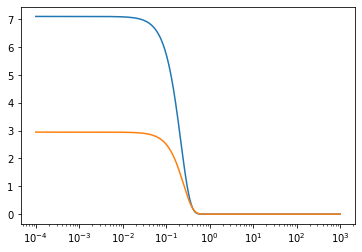

In [18]:
k_vals = np.logspace(-4, 3, 1000)
plt.semilogx(k_vals, hbGW(k_vals, z_vals[0], 1))
plt.semilogx(k_vals, hbGW2(k_vals, z_vals[0], 1))

# how many powers of the bias to include in integral

#plt.semilogx(k_vals, hbTH(k_vals, z_vals[0], 0.0))
#plt.semilogx(k_vals, hbSK(k_vals, z_vals[0], 0.0))
#plt.semilogx(k_vals, hb(k_vals, z_vals[0], 0.0))


In [31]:
kMesh,zMesh,dump = np.meshgrid(k_vals, z_vals, np.ones((3)))
#hb(kMesh, zMesh, 1.0).shape

In [32]:
r_vals = np.linspace(1e-3, 200, 100)
corr = CorrelationFunctions(cosmoDefault, lin_power, growth, hbGW, 1e-4, 1e3, z_vals, 1e-3, r_vals, intHelper)
dump = corr.compute(unbiased=True)

In [33]:
def compute_v(correlations):
    xi_unbiased, xi, dbarxi_dloga_unbiased, dbarxi_dloga =  correlations.get_correlation_functions(rMesh, zMesh, unbiased=True)
    v = r_vals * 100 * dbarxi_dloga / (3 * (1 + xi))
    v_dm = r_vals * 100 * dbarxi_dloga_unbiased / (3 * (1 + xi_unbiased))

    return v, v_dm

[autoreload of axion_kSZ_source.theory.eli_mass_functions failed: Traceback (most recent call last):
  File "/home/emelnick/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/emelnick/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/emelnick/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/mnt/c/users/emeln/thesis/axion_kSZ_source/notebooks/../../axion_kSZ_source/theory/eli_mass_func

In [20]:
# corrFFTLog = CorrelationFunctionsFFTLog(cosmo, lin_power, growth, hb, 1e-4, 1e3, z_vals, 1e-3, intHelper)
# corrFFTLog.compute(unbiased=True)
corrFFTLogGW = CorrelationFunctionsFFTLog(cosmoDefault, lin_power, growth, hbGW, 1e-4, 1e3, z_vals, 1e-3, intHelper)
corrFFTLogGW.compute(unbiased=True)


corrFFTLogGW2 = CorrelationFunctionsFFTLog(cosmoDefault2, lin2_power, growth2, hbGW2, 1e-4, 1e3, z_vals, 1e-3, intHelper)
corrFFTLogGW2.compute(unbiased=True)

# this flag gives you the unbiased correlation function
# corrFFTLogTH = CorrelationFunctionsFFTLog(cosmo, lin_power, growth, hbTH, 1e-4, 1e3, z_vals, 1e-3, intHelper)
# corrFFTLogTH.compute(unbiased=True)
# corrFFTLogSK = CorrelationFunctionsFFTLog(cosmo, lin_power, growth, hbSK, 1e-4, 1e3, z_vals, 1e-3, intHelper)
# corrFFTLogSK.compute(unbiased=True)

/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


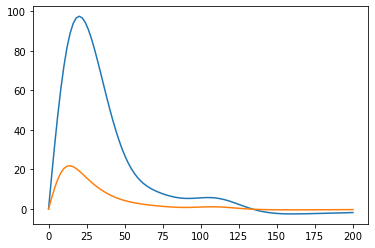

In [21]:
rMesh,zMesh=np.meshgrid(r_vals, z_vals)
plt.plot(r_vals, r_vals*corrFFTLogGW.get_correlation_functions(rMesh, zMesh, unbiased=True)[1][0])
plt.plot(r_vals, r_vals*corrFFTLogGW2.get_correlation_functions(rMesh, zMesh, unbiased=True)[1][0])

#plt.plot(r_vals, r_vals*corrFFTLogTH.get_correlation_functions(rMesh, zMesh, unbiased=True)[1][0])
#plt.plot(r_vals, r_vals*corrFFTLogSK.get_correlation_functions(rMesh, zMesh, unbiased=True)[1][0])

NameError: name 'corrFFTLogSK' is not defined

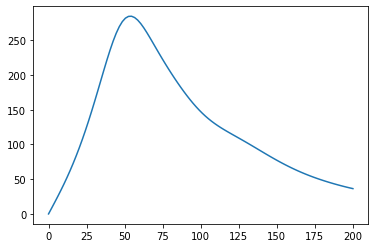

In [24]:
#plt.plot(r_vals, compute_v(corrFFTLog)[0][0]/compute_v(corrFFTLogSK)[0][0])
plt.plot(r_vals, compute_v(corr)[0][0])
plt.plot(r_vals, compute_v(corrFFTLogSK)[0][0])
plt.plot(r_vals, compute_v(corrFFTLogTH)[0][0])
plt.plot(r_vals, compute_v(corrFFTLogGW)[0][0])

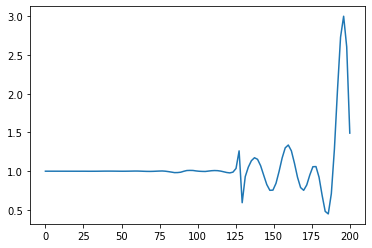

In [40]:
rMesh,zMesh = np.meshgrid(r_vals, z_vals)
fft_xi_lin, fft_xi, fft_out_dbarxi_dloga_lin, fft_out_dbarxi_dloga  = corrFFTLog.get_correlation_functions(rMesh, zMesh, unbiased=True)
xi_lin, xi, out_dbarxi_dloga_lin, out_dbarxi_dloga  = corr.get_correlation_functions(rMesh, zMesh, unbiased=True)
#plt.plot(r_vals, r_vals*fft_xi[0])
plt.plot(r_vals, xi[0]/fft_xi[0])
#plt.plot(r_vals, r_vals*xi[0])
#plt.plot(r_vals, r_vals*fft_xi_lin[0])
#plt.plot(r_vals, r_vals*xi_lin[0])

<ipython-input-41-4625c0b43631>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(r_vals, fft_out_dbarxi_dloga[0]/out_dbarxi_dloga[0])


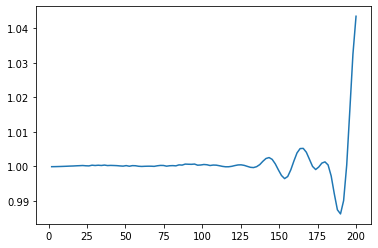

In [41]:
plt.plot(r_vals, fft_out_dbarxi_dloga[0]/out_dbarxi_dloga[0])
#plt.plot(r_vals, )
#plt.plot(r_vals, r_vals*fft_out_dbarxi_dloga_lin[0])
#plt.plot(r_vals, r_vals*out_dbarxi_dloga_lin[0])

In [42]:
r, lin_xi_fft, lin_dxi_fft, nonlin_xi_fft, nonlin_dxi_fft = corrFFTLog.compute_xi(z_vals, deriv=True, unbiased=True)

/Users/dgrin/opt/miniconda3/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


In [43]:
lin_xi, lin_dxi, nonlin_xi, nonlin_dxi = corr.compute_xi(r, z_vals, deriv=True, unbiased=True)

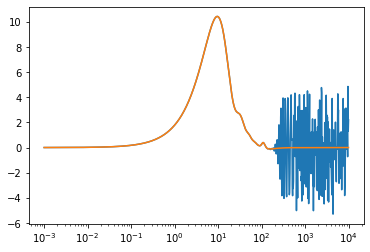

In [44]:
plt.semilogx(r, r*nonlin_dxi[0])
plt.semilogx(r, r*nonlin_dxi_fft[0])

In [45]:
1-nonlin_dxi[0]/nonlin_dxi_fft[0]

array([-1.38557303e-04, -1.33454904e-04, -1.38489804e-04, ...,
       -3.25786168e+07, -2.53109339e+06,  9.17287920e+05])

In [46]:
1-nonlin_xi[0]/nonlin_xi_fft[0]

array([-1.06953552e-04, -1.01773435e-04, -1.06885263e-04, ...,
       -3.25931425e+07, -2.66215585e+06,  8.84092970e+05])

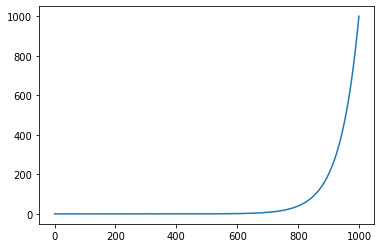

In [47]:
fig=plt.figure().add_subplot()

fig.plot(k_vals)

In [31]:
print("Omega_M/h^2 default =",cosmoDefault.OmegaM)
print("Omega_M/h^2 axion   =",cosmoAxion.OmegaM)
print("Omega_M default =",cosmoDefault.omegaM)
print("Omega_M axion   =",cosmoAxion.omegaM)
print("rho_mean default =",cosmoDefault.rho_mean)
print("rho_mean axion   =",cosmoAxion.rho_mean)
print("rho_cr default =",cosmoDefault.RHO_C)
print("rho_cr axion   =",cosmoAxion.RHO_C)
print("h default =",cosmoDefault.h)
print("h axion   =",cosmoAxion.h)

Omega_M/h^2 default = 0.274170524691358
Omega_M/h^2 axion   = 0.274170524691358
Omega_M default = 0.14212999999999998
Omega_M axion   = 0.14212999999999998
rho_mean default = 75388498306.23651
rho_mean axion   = 75388498306.23651
rho_cr default = 1.86e-29
rho_cr axion   = 1.86e-29
h default = 0.72
h axion   = 0.72


In [198]:
def m_from_R(R,z=0,cosmo_type='default',h_adjust='false',density='mean') :
    if (not (cosmo_type=='axion' or cosmo_type=='default' or cosmo_type=='default2')) :
        print("Not a valid cosmology")
        return None
    
    if (not (density=='mean' or density=='virial')) :
        print("Not a valid density type")
        return None
    
    rho = cosmoDefault.RHO_C
    if density == 'virial' :
        rho *= 178        
    
    # Determining omega & h adjustments
    if cosmo_type == 'axion':
        if h_adjust == 'true':
            omega_m0 = cosmoAxion.omegaM
            rho *= cosmoAxion.h**2
        else :
            omega_m0 = cosmoAxion.OmegaM
    elif cosmo_type == 'default' :
        if h_adjust == 'true':
            omega_m0 = cosmoDefault.omegaM
            rho *= cosmoDefault.h**2
        else :
            omega_m0 = cosmoDefault.OmegaM
    elif cosmo_type == 'default2' :
        if h_adjust == 'true':
            omega_m0 = cosmoDefault2.omegaM
            rho *= cosmoDefault2.h**2
        else :
            omega_m0 = cosmoDefault2.OmegaM

    rho *= 1000 * (1/2e30) * (3.086e22)**3 # In Msun/Mpc^3
    
    return (4/3) * np.pi * R**3 * rho * omega_m0 * (1+z)**3

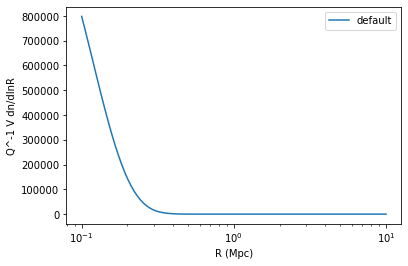

In [180]:
n = 100
z=6
R_vals = np.logspace(-1,1,n)

density_type = 'mean'

m_vals = m_from_R(R_vals,cosmo_type='default',density=density_type,z=z)
Q = np.zeros(n)

integrand = lambda r: (1/m_from_R(r,z=z)) * bubbly_FFT_default(m_from_R(r,cosmo_type='default',density=density_type,z=z),z) *  r**3

for i in range(n):
    Q[i] = (4/3) * np.pi * quad(integrand,0,R_vals[i])[0]
#     print('M:',m_vals)
#     print('Q:',Q)
#     print('B:',bubbly(m_vals,z))

plt.plot(R_vals,4 * np.pi * (1/Q) * R_vals**3 * bubbly_FFT_default(m_vals,z),label='default')

m_vals = m_from_R(R_vals,cosmo_type='default2',density=density_type,z=z)
Q2 = np.zeros(n)

integrand = lambda r: (1/m_from_R(r,z=z)) * bubbly_FFT_default2(m_from_R(r,cosmo_type='default2',density=density_type,z=z),z) *  r**3

for i in range(n):
    Q2[i] = (4/3) * np.pi * quad(integrand,0,R_vals[i])[0]
#     print('M:',m_vals)
#     print('Q:',Q)
#     print('B:',bubbly(m_vals,z))

# plt.plot(R_vals,4 * np.pi * (1/Q2) * R_vals**3 * bubbly_FFT_default2(m_vals,z),label='default2')


plt.xscale('log')
plt.xlabel('R (Mpc)')
plt.ylabel('Q^-1 V dn/dlnR')
plt.legend()

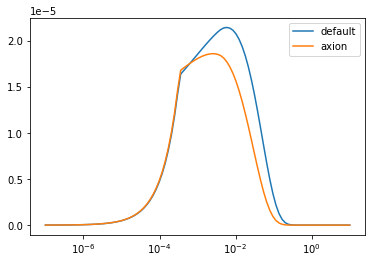

In [199]:
R_vals = np.logspace(-7,1,100)
z = 6
m_vals = m_from_R(R_vals,z=z,cosmo_type='default')

y = (R_vals**3) * bubbly_FFT_default(m_vals,z)
m_vals2 = m_from_R(R_vals,z=z,cosmo_type='default2')

y2 = (R_vals**3) * bubbly_FFT_default2(m_vals,z)

m_valsaxion = m_from_R(R_vals,z=z,cosmo_type='axion')

yaxion = (R_vals**3) * bubbly_FFT_axion(m_vals,z)

plt.plot(R_vals,y,label='default')
# plt.plot(R_vals,y2,label='default2')
plt.plot(R_vals,yaxion,label='axion')
plt.legend()
plt.xscale('log')

In [ ]:
z = 12
n = 10
R_vals = np.logspace(-1,2,num=n)
rho_vir = 178 * 1.86e-26 * 0.2741705 * (1+z)**3 # kg/m^3

# Convert rho_vir to Msun/Mpc^3
rho_vir = rho_vir * (3.241e23)**3 / (2e30) # Msun/Mpc^3

def m_R(R) :
    return 1.86e-26 * 0.2741705 * (3.08e23)**3 / (2e30) * (4/3) * np.pi * R**3
      
q_integrand = lambda r: r**2 * bubbly(m_R(r),z)
Q = np.zeros(n)
for i in range(len(R_vals)):
    Q[i] = 4 * np.pi * quad(q_integrand,0,R_vals[i])[0]

# print(m_R(R_vals))
# print(1/Q)
print(bubbly(m_R(R_vals),z))
# print(R_vals)
    
print(4 * np.pi * (1/Q) * R_vals**3 * bubbly(m_R(R_vals),z))
m_vals = m_R(R_vals)

for z in [12,14,16,18]:
    q_integrand = lambda r: r**3 * bubbly(m_R(r),z)
#     plt.loglog(m_vals,bubbly(m_vals,z))
#     plt.loglog(R_vals,q_integrand(R_vals))
#     plt.plot(R_vals,4 * np.pi * (1/Q) * R_vals**3 * bubbly(m_R(R_vals),z))
    plt.xscale('log')
plt.show()

mMin = 19043319.21454352
sigma = [0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535 0.17409535
 0.17409535 0.17409535 0.1740

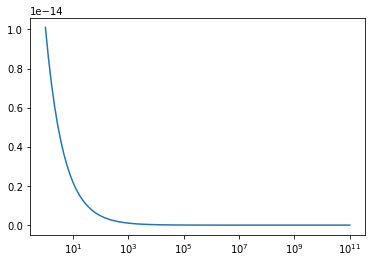

In [194]:
z = 20
density_type = 'mean'
n = 10
R_vals = np.logspace(-1,1,n)

rho = cosmoDefault.RHO_C * 1000 * (1/2e30) * (3.086e22)**3 * cosmoDefault.OmegaM
if density_type == 'virial' :
    rho *= 178

m_vals = m_from_R(R_vals,density=density_type,z=z)

integrand = lambda r: (1/m_from_R(r,z=z)) * bubbly(m_from_R(r,density=density_type,z=z),z) *  r**3
integrand_m = lambda m: bubbly(m,z)/rho
# Q = quad(integrand_m,0,1e100)
# print(Q[0])


m_vals = np.logspace(0,11,100)
plt.plot(m_vals,bubbly(m_vals,z))
plt.xscale('log')
# plt.yscale('log')

1.8457546750396832
0.7049610266942502
0.000503562316226998
mMin = 39098181.73846749
sigma = [1.84575468e+00 1.77563532e+00 1.70673162e+00 1.63896214e+00
 1.57224219e+00 1.50648308e+00 1.44159097e+00 1.37746559e+00
 1.31399846e+00 1.25108447e+00 1.18876845e+00 1.12720691e+00
 1.06651226e+00 1.00677496e+00 9.48069475e-01 8.90460345e-01
 8.34009452e-01 7.78779164e-01 7.24839260e-01 6.72257326e-01
 6.21101914e-01 5.71446350e-01 5.23370698e-01 4.76959613e-01
 4.32303867e-01 3.89505421e-01 3.48671588e-01 3.09902168e-01
 2.73291520e-01 2.38896193e-01 2.06781955e-01 1.77063367e-01
 1.49755742e-01 1.25044634e-01 1.02858605e-01 8.28343476e-02
 6.62332873e-02 5.15404051e-02 3.88659129e-02 2.93002817e-02
 2.18353019e-02 1.57864331e-02 1.10241584e-02 7.46748206e-03
 4.93707766e-03 3.20324124e-03 2.04800569e-03 1.29428489e-03
 8.10363684e-04 5.03562316e-04]
sigma_min = 1.1271470292390249
K = 1.584911068059482
C0 = -0.8403904257481636
B0 = [-4.78568723 -4.78582544 -4.78597817 -4.78614757 -4.78633618 

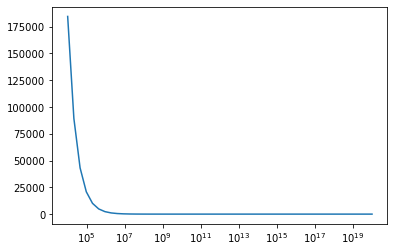

In [83]:
m_vals = np.logspace(4,20)
m1 = 1e4
m2 = 1e10
m3 = 1e20
z = 12
print(sigmaIntFFTLog(m1,z))
print(sigmaIntFFTLog(m2,z))
print(sigmaIntFFTLog(m3,z))
plt.plot(m_vals,bubbly(m_vals,z))
plt.xscale('log')

In [82]:
bubbly = BubbleMassFunction(cosmoDefault,sigmaIntFFTLog)

In [76]:
class testFunction(object):
    def __init__(self, cosmo, sigmaInterpolator):
        """

                :type sigmaInterpolator: SigmaInterpolator
                :type cosmo: Cosmology
                """
        self.cosmo = cosmo
        self.sigmaInt = sigmaInterpolator
    def __call__(self,m,z):
        print(self.sigmaInt(m,z))

test_bubble = testFunction(cosmoDefault,sigmaInt)

In [45]:
m = 1e10
z = 12
test_bubble(m,z) #This is the right sigma!

0.18790334666540126


In [172]:
bubbly_FFT_default = BubbleMassFunction(cosmoDefault,sigmaIntFFTLog)
bubbly_default = BubbleMassFunction(cosmoDefault,sigmaInt)
bubbly_FFT_axion = BubbleMassFunction(cosmoAxion,sigmaIntFFTLog_axion)
bubbly_axion = BubbleMassFunction(cosmoAxion,sigmaInt_axion)
bubbly_default2 = BubbleMassFunction(cosmoDefault2,sigmaInt2)
bubbly_FFT_default2 = BubbleMassFunction(cosmoDefault2,sigmaIntFFTLog2)

In [102]:
z_vals = [0,3,6,9,12,15,18]
m_vals = np.logspace(4,12,10)
for z in z_vals:
    print("z =",z)
    print("\nDefault:")
    bubbly_default(m_vals,z)
    print("\nFFT Default:")
    bubbly_FFT_default(m_vals,z)
    print("\nAxion:")
    bubbly_axion(m_vals,z)
    print("\nFFT Axion:")
    bubbly_FFT_axion(m_vals,z)
    print("\n-----------------\n")
#


z = 0

Default:
mMin = 1832616487.4609063
sigma = [1.07490555 1.07490555 1.07490555 1.07490555 1.07490555 1.07490555
 1.07490555 1.07490555 1.07490555 1.07490555]
sigma_min = 1.0749055503053988
K = 1.584911068059482
C0 = -0.7232962323722179
B0 = [-0.72329623 -0.72329623 -0.72329623 -0.72329623 -0.72329623 -0.72329623
 -0.72329623 -0.72329623 -0.72329623 -0.72329623]

FFT Default:
mMin = 1832616487.4609063
sigma = [10.51083439  9.44061811  8.41569372  7.4254536   6.4609856   5.53172961
  4.64763154  3.8162516   3.04558144  2.34475139]
sigma_min = 4.715696627254466
K = 1.584911068059482
C0 = -8.88377528288561
B0 = [-8.88377528 -8.88377528 -8.88377528 -8.88377528 -8.88377528 -8.88377528
 -8.88377528 -8.88377528 -8.88377528 -8.88377528]

Axion:
mMin = 1832616487.4609063
sigma = [0.99517112 0.99517112 0.99517112 0.99517112 0.99517112 0.99517112
 0.99517112 0.99517112 0.99517112 0.99517112]
sigma_min = 0.9951711212170117
K = 1.584911068059482
C0 = -0.5445792655294839
B0 = [-0.54457927 -0.544

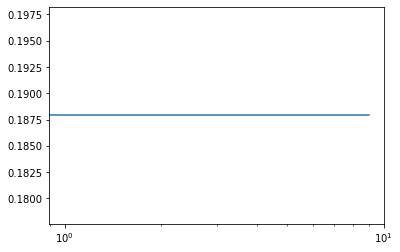

In [104]:
plt.plot(sigmaInt(m_vals,10))
# plt.plot(sigmaIntFFTLog(m_vals,10))
plt.xscale('log')
